In [1]:
import sys
sys.path.append('../')
from _imports import *

In [2]:
train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
test_X = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

In [3]:
keras.utils.set_random_seed(100)

n_features = train_X.shape[1]

rmodel = keras.Sequential([
  keras.layers.Input(shape=(n_features,), name="input"),
  keras.layers.Dense(
    500, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden1",
  ),
  keras.layers.Dropout(0.05, seed=101, name="dropout1"),
  keras.layers.Dense(
    1000, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden2",
  ),
  keras.layers.Dropout(0.05, seed=102, name="dropout2"),
  keras.layers.Dense(
    500, activation="relu",
    kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
    bias_regularizer=keras.regularizers.L2(1e-4),
    activity_regularizer=keras.regularizers.L2(1e-5),
    name="hidden3",
  ),
  keras.layers.Dropout(0.05, seed=103, name="dropout3"),
  keras.layers.Dense(1, activation="linear", name="output")
])

rmodel.compile(
    loss=keras.losses.MeanSquaredError(name="MSE"),
    optimizer=keras.optimizers.Adam(),
    metrics=[
      keras.metrics.RootMeanSquaredError(name="RMSE"),
      keras.metrics.MeanAbsoluteError(name="MAE"),
    ]
)

rhistory = rmodel.fit(
    train_X,
    train_y,
    epochs=250,
);

print("train:", rmodel.evaluate(
  train_X,
  train_y,
  verbose=0,
))

Epoch 1/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - MAE: 0.4440 - RMSE: 0.5995 - loss: 0.9403
Epoch 2/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - MAE: 0.2783 - RMSE: 0.3872 - loss: 0.6531
Epoch 3/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - MAE: 0.2228 - RMSE: 0.3278 - loss: 0.5709
Epoch 4/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.1799 - RMSE: 0.2561 - loss: 0.4950
Epoch 5/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - MAE: 0.1408 - RMSE: 0.1907 - loss: 0.4363
Epoch 6/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - MAE: 0.1360 - RMSE: 0.1923 - loss: 0.4099
Epoch 7/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - MAE: 0.1466 - RMSE: 0.2135 - loss: 0.3938
Epoch 8/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - MAE: 0.1226 - RMSE: 0.1653 - loss: 0.3524
Epoch 9/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - MAE: 0.1114 - RMSE: 0.1534 - loss: 0.3266
Epoch 10/250
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - MAE: 0.1312 - RMSE: 0.1775 - loss: 0.3145
Epoch 11/250
46/46 ━━━━━━━━━━━━━━━━━━

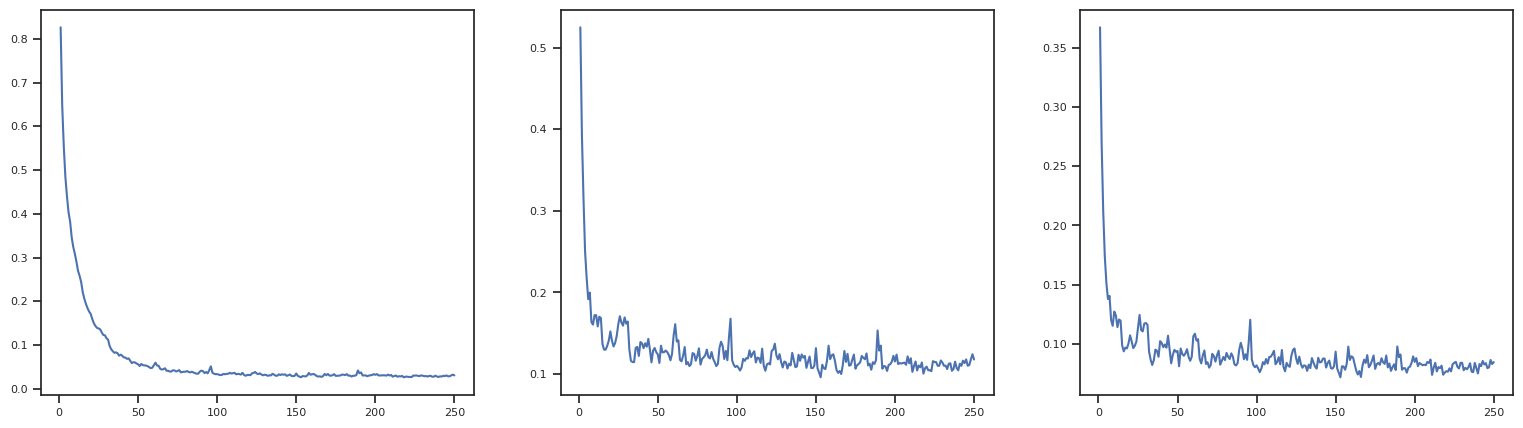

In [4]:
mse = rhistory.history["loss"]
rmse = rhistory.history["RMSE"]
mae = rhistory.history["MAE"]
steps = list(range(1, len(mse) + 1))

plt.figure(figsize=(19, 5))
plt.subplot(1,3,1)
plt.plot(steps, mse)
plt.subplot(1,3,2)
plt.plot(steps, rmse)
plt.subplot(1,3,3)
plt.plot(steps, mae)
plt.show()

In [5]:
train_y_pred = rmodel.predict(
  train_X, 
  verbose=0,
)[:,0]

test_y_pred = rmodel.predict(
  test_X, 
  verbose=0,
)[:,0]

In [6]:
test_y_pred.min(), test_y_pred.max()

(-3.631277, 3.0552804)

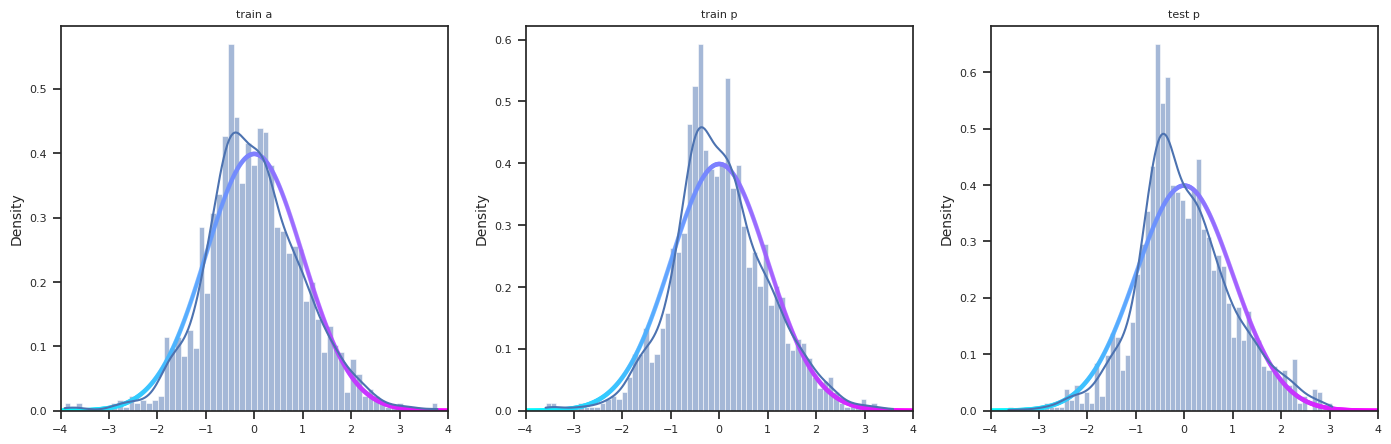

In [7]:
nx = np.linspace(-4,4,1001,True)
ny = scipy.stats.norm.pdf(nx)

plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.histplot(x=train_y, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train a")

plt.subplot(1,3,2)
sns.histplot(x=train_y_pred, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("train p")

plt.subplot(1,3,3)
sns.histplot(x=test_y_pred, bins=64, stat="density", kde=True);
plt.scatter(nx, ny, s=5, c=nx, cmap="cool", alpha=0.5)
plt.xlim(-4,4);
plt.title("test p")

plt.show()